In [5]:
import pandas as pd;
import numpy as np;

In [12]:
df = pd.read_csv("./placement.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [15]:
import matplotlib.pyplot as plt;

In [26]:
df['cgpa'].describe()

count    100.000000
mean       5.991000
std        1.143634
min        3.300000
25%        5.075000
50%        6.000000
75%        6.900000
max        8.500000
Name: cgpa, dtype: float64

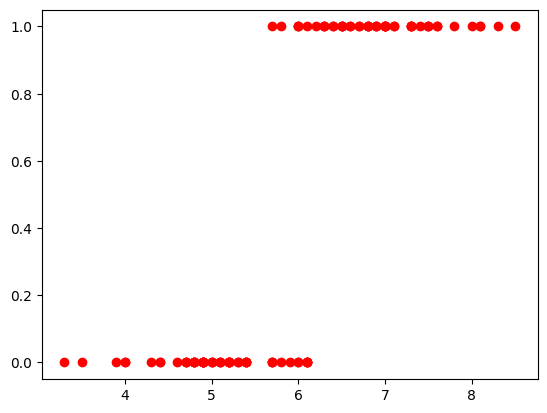

In [20]:
plt.scatter(df["cgpa"], df["placement"] , color="red")

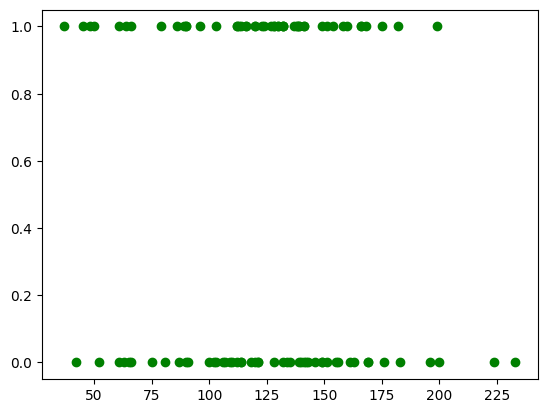

In [23]:
plt.scatter(df["iq"], df["placement"] , color="green")

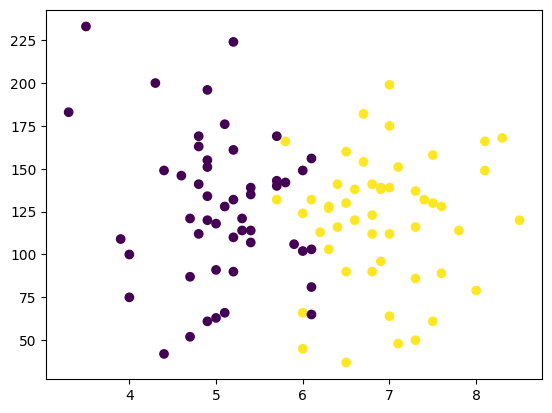

In [33]:
plt.scatter(df["cgpa"], df["iq"] , c=df["placement"] )

<p style="color:white ; background-color:black; border-radius:20px;  padding:5px;padding-left:100px;">now extract input and output</p>

In [36]:
input_cols = df.iloc[: , 0:2]
output_cols = df.iloc[: , -1];

In [37]:
from sklearn.model_selection import train_test_split;

In [39]:
input_train , input_test , output_train , output_test = train_test_split(input_cols, output_cols , test_size=0.1, random_state=101)

In [50]:
input_train

,cgpa,iq
82,6.5,37.0
25,5.0,91.0
45,6.0,66.0
68,4.0,75.0
37,8.1,149.0
...,...,...
63,6.3,128.0
70,6.3,127.0
81,5.4,107.0
11,6.9,138.0


In [52]:
output_train

82    1
25    0
45    1
68    0
37    1
     ..
63    1
70    1
81    0
11    1
95    0
Name: placement, Length: 90, dtype: int64

In [59]:
# scaling
from sklearn.preprocessing import StandardScaler;
scaler = StandardScaler();
input_train = scaler.fit_transform(input_train);
input_test = scaler.fit_transform(input_test);

In [61]:
from sklearn.linear_model import LogisticRegression;
model = LogisticRegression();

model.fit(input_train , output_train);


In [63]:
output_test

16    0
1     0
43    1
67    0
89    0
21    1
97    1
51    0
6     0
41    0
Name: placement, dtype: int64

In [64]:
output_pred = model.predict(input_test)


In [66]:
from sklearn.metrics import accuracy_score;

accuracy_score(output_test , output_pred)

0.9

In [68]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

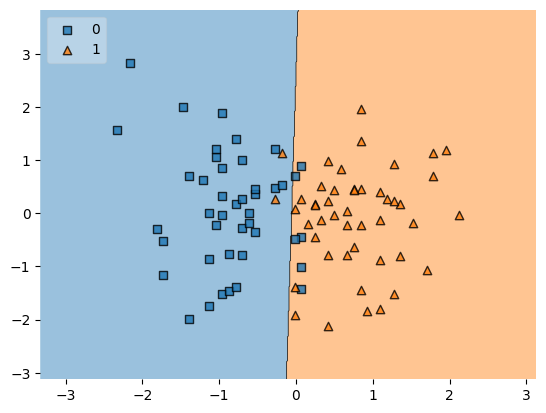

In [70]:
plot_decision_regions(input_train , output_train.values , clf=model , legend=2)

In [72]:
import pickle;

In [74]:
pickle.dump(model , open("model.pkl" , "wb"))
# now you can use this model for prediction in you web app.